In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [21]:
sales_data=pd.read_csv("Commercial_Store_Sales_Data.csv")

In [22]:
#Inspect the data 
print(sales_data.head())

  Transaction_ID        Date Store_Location   Category  Units_Sold  \
0        TXN1000  2024-01-01       Downtown  Furniture           4   
1        TXN1001  2024-01-02       Downtown       Toys          14   
2        TXN1002  2024-01-03           Mall  Furniture          12   
3        TXN1003  2024-01-04        Suburbs       Toys          14   
4        TXN1004  2024-01-05        Suburbs  Groceries          14   

   Unit_Price  Total_Sale_Amount  Payment_Method Customer_Age_Group  \
0      312.47            1241.78  Mobile Payment              36-50   
1      283.68            3965.95            Cash              36-50   
2       54.49             653.88  Mobile Payment              18-25   
3      271.13            3771.31     Credit Card              26-35   
4      255.41            3542.14     Credit Card              26-35   

   Discount_Applied  
0              8.10  
1              5.57  
2              0.00  
3             24.51  
4             33.60  


In [23]:
print(sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      100 non-null    object 
 1   Date                100 non-null    object 
 2   Store_Location      100 non-null    object 
 3   Category            100 non-null    object 
 4   Units_Sold          100 non-null    int64  
 5   Unit_Price          100 non-null    float64
 6   Total_Sale_Amount   100 non-null    float64
 7   Payment_Method      100 non-null    object 
 8   Customer_Age_Group  100 non-null    object 
 9   Discount_Applied    100 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 7.9+ KB
None


In [24]:
#check the missing values 
print(sales_data.isnull().sum())

Transaction_ID        0
Date                  0
Store_Location        0
Category              0
Units_Sold            0
Unit_Price            0
Total_Sale_Amount     0
Payment_Method        0
Customer_Age_Group    0
Discount_Applied      0
dtype: int64


In [25]:
#Remove Duplicates if any 
sales_data = sales_data.drop_duplicates()

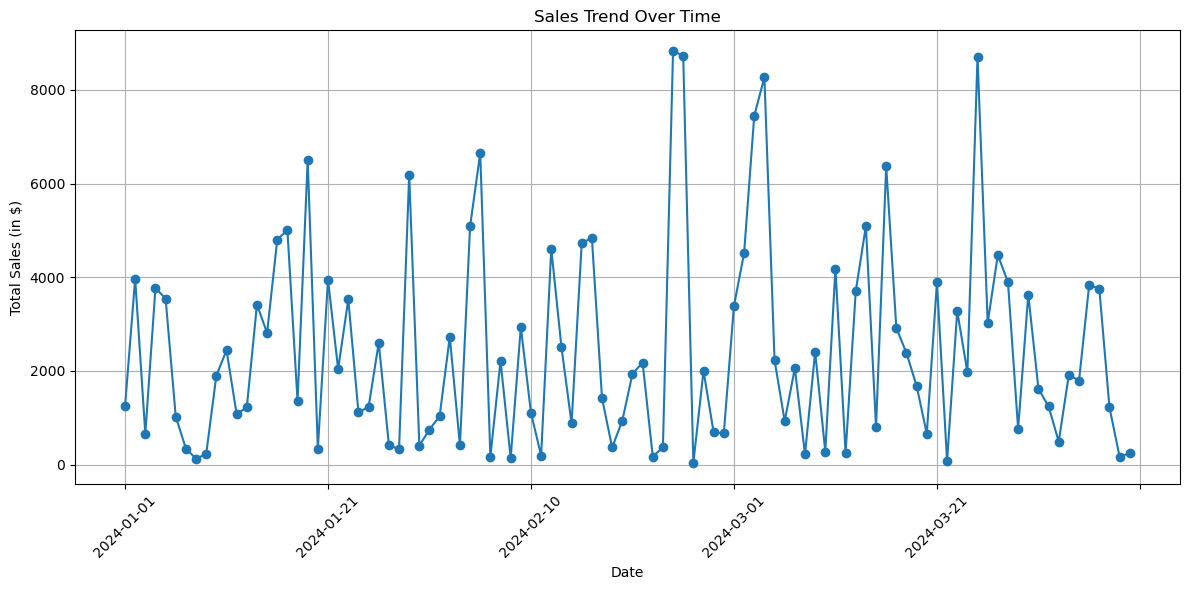

In [26]:
sales_by_date = sales_data.groupby('Date')['Total_Sale_Amount'].sum()

sales_by_date.plot(
    figsize=(12, 6), 
    title="Sales Trend Over Time", 
    xlabel="Date", 
    ylabel="Total Sales (in $)", 
    marker='o', 
    linestyle='-', 
    grid=True
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


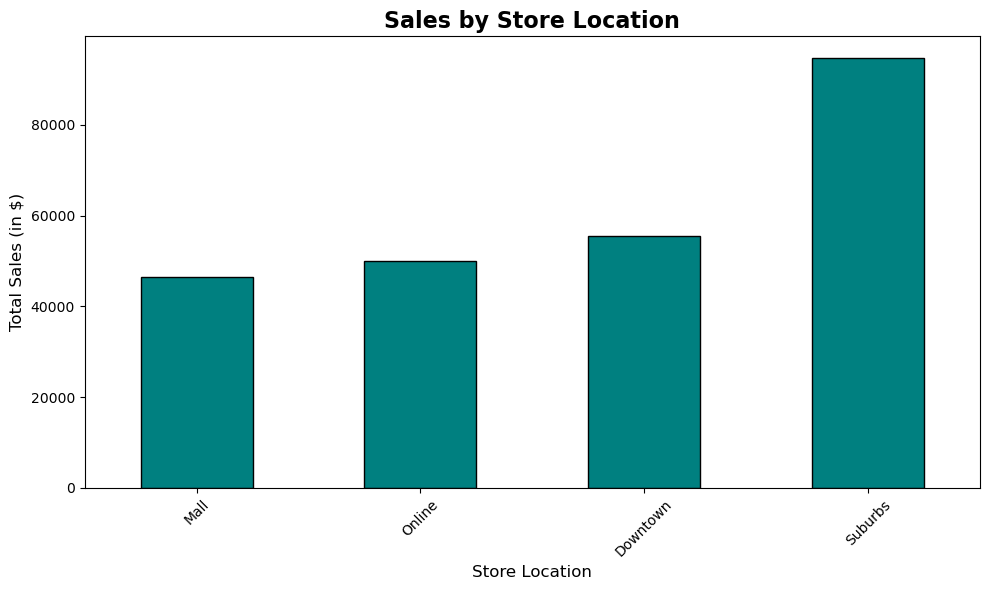

In [27]:
#Sales by Store Location 
plt.figure(figsize=(10, 6))
sales_by_location = sales_data.groupby('Store_Location')['Total_Sale_Amount'].sum()
sales_by_location.sort_values().plot(kind='bar', color='teal', edgecolor='black')
plt.title("Sales by Store Location", fontsize=16, fontweight='bold')
plt.xlabel("Store Location", fontsize=12)
plt.ylabel("Total Sales (in $)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


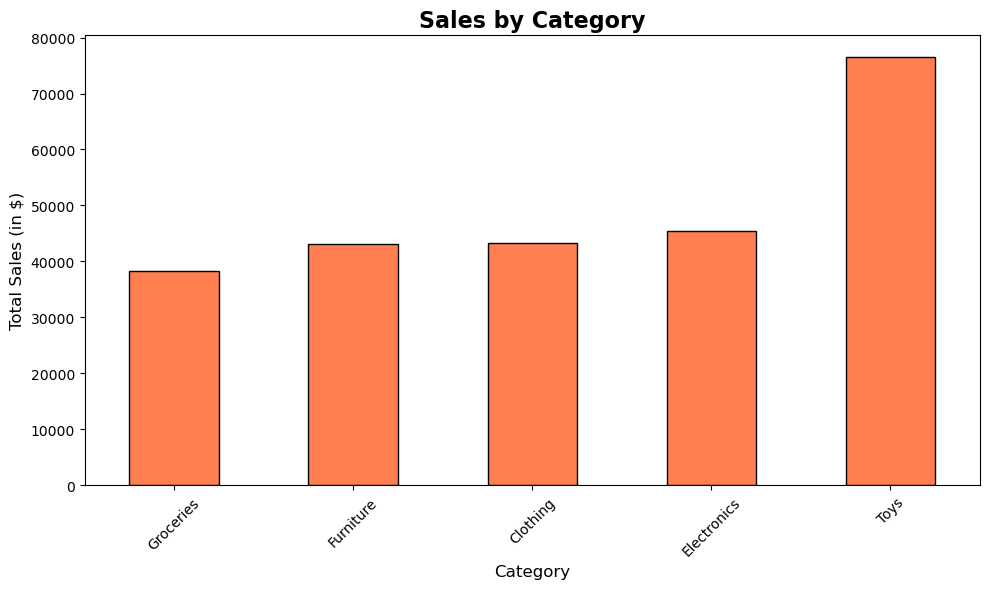

In [28]:
#sales by category
plt.figure(figsize=(10, 6))
category_sales = sales_data.groupby('Category')['Total_Sale_Amount'].sum()
category_sales.sort_values().plot(kind='bar', color='coral', edgecolor='black')
plt.title("Sales by Category", fontsize=16, fontweight='bold')
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales (in $)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

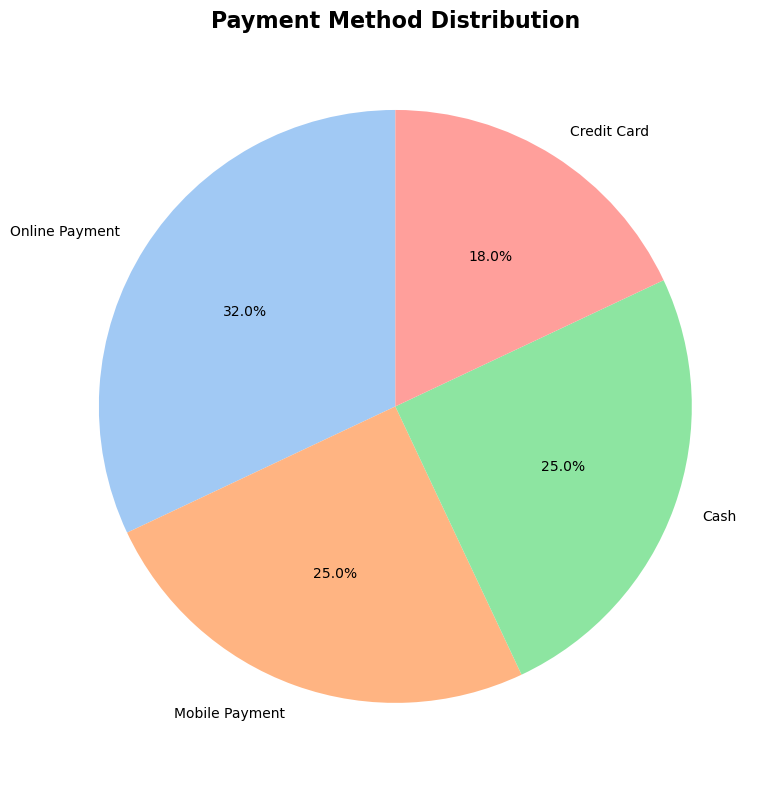

In [29]:
#Payment Method Distribution 
plt.figure(figsize=(8, 8))
payment_method_distribution = sales_data['Payment_Method'].value_counts()
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title("Payment Method Distribution", fontsize=16, fontweight='bold')
plt.ylabel("")  # Remove default ylabel
plt.tight_layout()
plt.show()

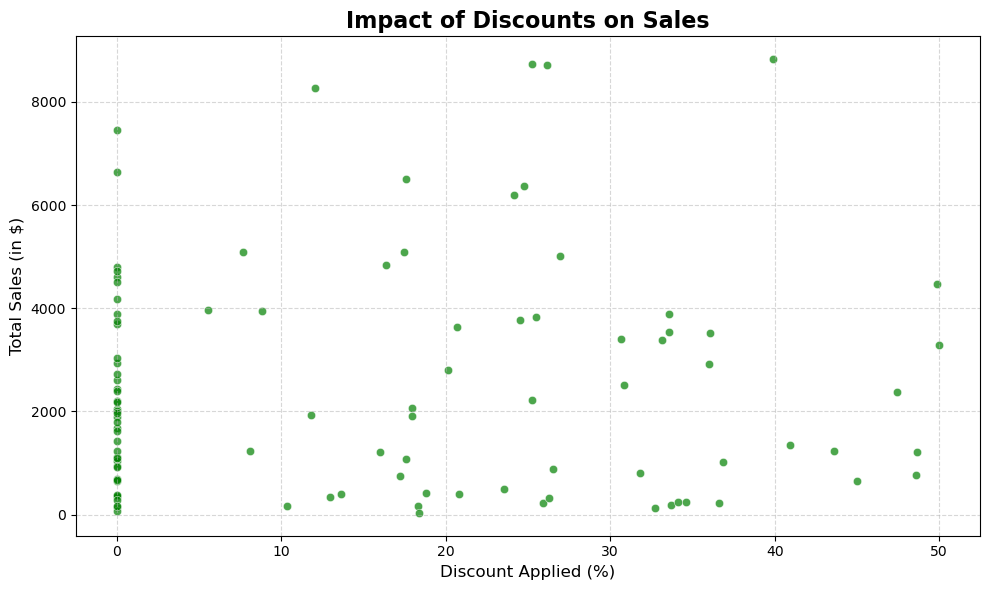

In [30]:
#Discount Impact on Sales 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sales_data, x='Discount_Applied', y='Total_Sale_Amount', color='green', alpha=0.7)
plt.title("Impact of Discounts on Sales", fontsize=16, fontweight='bold')
plt.xlabel("Discount Applied (%)", fontsize=12)
plt.ylabel("Total Sales (in $)", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

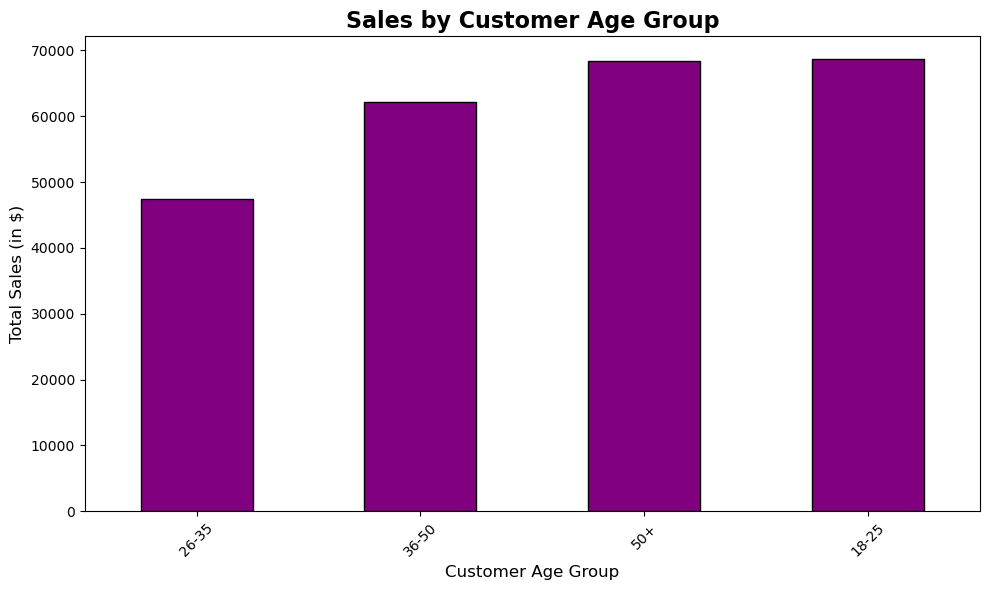

In [31]:
#Sales by Customer Age Group 
plt.figure(figsize=(10, 6))
age_group_sales = sales_data.groupby('Customer_Age_Group')['Total_Sale_Amount'].sum()
age_group_sales.sort_values().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Sales by Customer Age Group", fontsize=16, fontweight='bold')
plt.xlabel("Customer Age Group", fontsize=12)
plt.ylabel("Total Sales (in $)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

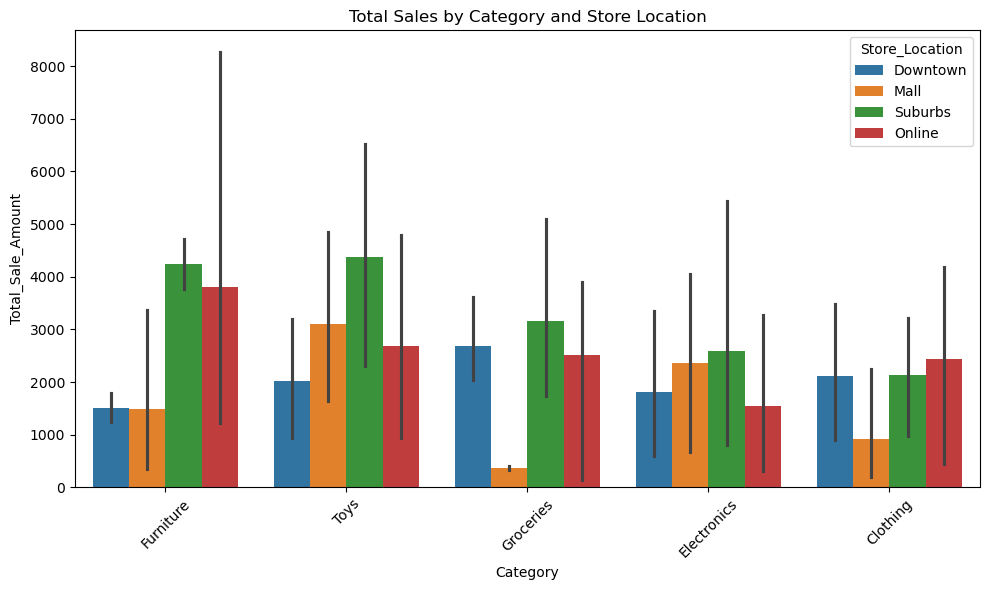

In [32]:
#Total Sales by Category and Store Location 
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_data, x='Category', y='Total_Sale_Amount', hue='Store_Location')
plt.title("Total Sales by Category and Store Location")
plt.xticks(rotation=45)
plt.tight_layout()

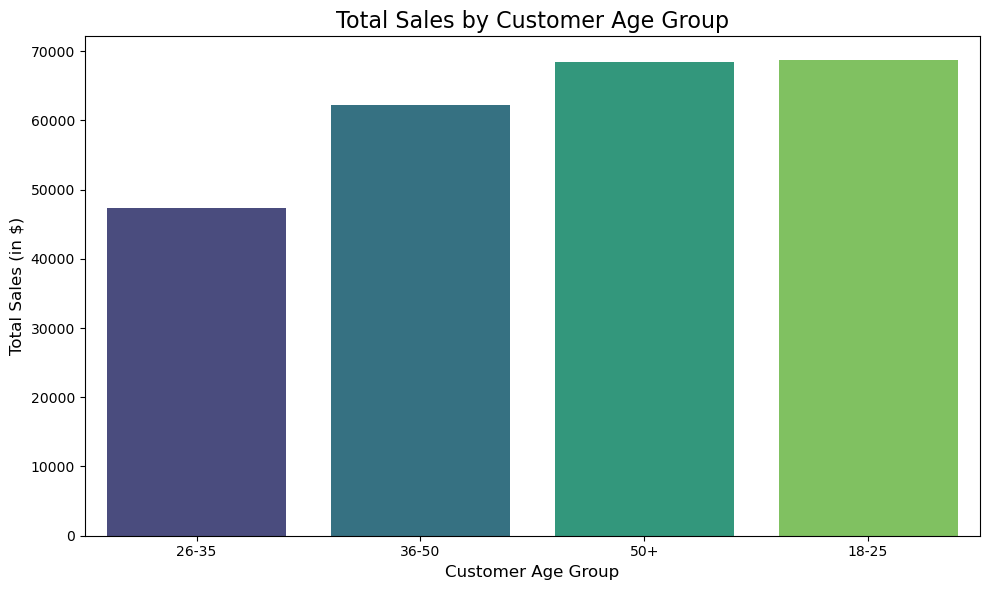

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze sales by customer age group
age_group_sales = sales_data.groupby('Customer_Age_Group')['Total_Sale_Amount'].sum().sort_values()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, hue=age_group_sales.index, palette='viridis', legend=False)
plt.title('Total Sales by Customer Age Group', fontsize=16)
plt.xlabel('Customer Age Group', fontsize=12)
plt.ylabel('Total Sales (in $)', fontsize=12)
plt.tight_layout()
plt.show()


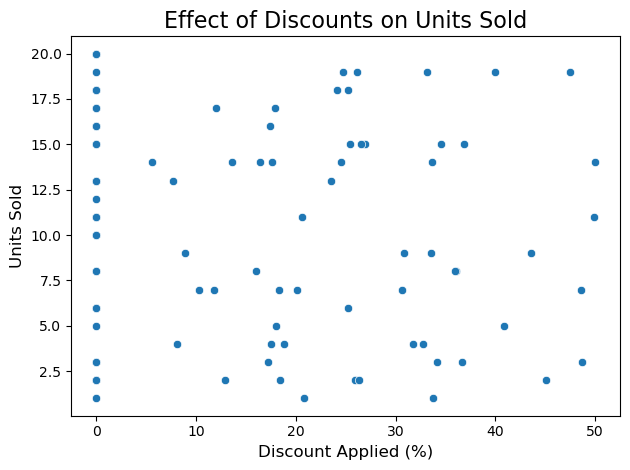

Correlation between Discount and Units Sold: -0.06


In [34]:
# Correlation between discount and units sold
correlation = sales_data[['Discount_Applied', 'Units_Sold']].corr()

# Visualization
sns.scatterplot(x='Discount_Applied', y='Units_Sold', data=sales_data)
plt.title('Effect of Discounts on Units Sold', fontsize=16)
plt.xlabel('Discount Applied (%)', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Correlation between Discount and Units Sold: {correlation.iloc[0, 1]:.2f}")


First few days of sales data:
        Date  Units_Sold
0 2024-01-01           4
1 2024-01-02          14
2 2024-01-03          12
3 2024-01-04          14
4 2024-01-05          14


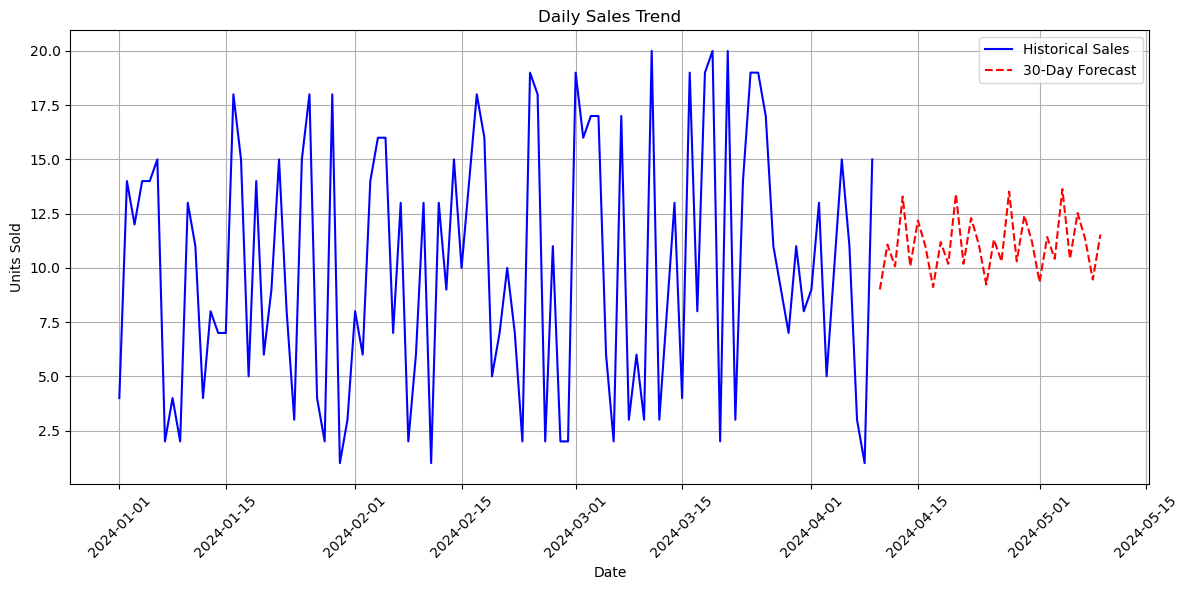


Demand Forecast Insights:
Average Daily Sales: 10 units
Predicted Average Daily Sales (Next 30 days): 11 units
Predicted Maximum Daily Sales: 14 units
Predicted Minimum Daily Sales: 9 units

Store Performance:
                sum       mean
Store_Location                
Suburbs         383  13.206897
Downtown        238   8.814815
Mall            203   8.458333
Online          185   9.250000

Category Performance:
             sum       mean
Category                   
Toys         265  10.600000
Electronics  237  10.772727
Clothing     189   8.590909
Groceries    176  11.000000
Furniture    142   9.466667


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read and prepare data
df = pd.read_csv('Commercial_Store_Sales_Data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create daily total sales
daily_sales = df.groupby('Date')['Units_Sold'].sum().reset_index()
print("\nFirst few days of sales data:")
print(daily_sales.head())

# Plot historical sales
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['Units_Sold'], label='Historical Sales', color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)

# Train forecasting model
model = ExponentialSmoothing(
    daily_sales['Units_Sold'],
    seasonal_periods=7,  # Weekly seasonality
    trend='add',
    seasonal='add'
).fit()

# Generate 30-day forecast
future_dates = pd.date_range(
    start=daily_sales['Date'].max(),
    periods=31,
    freq='D'
)[1:]  # Exclude last day of historical data

forecast = model.forecast(30)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Units_Sold': forecast
})

# Save the forecast DataFrame to a CSV file on D drive
forecast_df.to_csv('D:/Demand_Forecast.csv', index=False)  # Change the path to your desired location

# Plot forecast
plt.plot(future_dates, forecast, 'r--', label='30-Day Forecast')
plt.legend()
plt.tight_layout()
plt.show()

# Print insights
print("\nDemand Forecast Insights:")
print(f"Average Daily Sales: {daily_sales['Units_Sold'].mean():.0f} units")
print(f"Predicted Average Daily Sales (Next 30 days): {forecast.mean():.0f} units")
print(f"Predicted Maximum Daily Sales: {forecast.max():.0f} units")
print(f"Predicted Minimum Daily Sales: {forecast.min():.0f} units")

# Store location analysis
print("\nStore Performance:")
store_sales = df.groupby('Store_Location')['Units_Sold'].agg(['sum', 'mean'])
print(store_sales.sort_values('sum', ascending=False))

# Category analysis
print("\nCategory Performance:")
category_sales = df.groupby('Category')['Units_Sold'].agg(['sum', 'mean'])
print(category_sales.sort_values('sum', ascending=False))
